# Pandas (Continue...)

In [9]:
import math
a = 5**3
a = math.pow(5,3)
a

125.0

In [10]:
from math import pow
a = pow(5,3)
a

125.0

In [14]:
test = "27-06-2020"
test = test.split("-")
test

['27', '06', '2020']

## Recap

In [8]:
import pandas as pd

states = {'TX': (1345, 36, -5),
          'NY': (1309, 37, -13),
          'IL': (1296, 37, -15),
          'CA': (1291, 39, -5),
          'IR': (1258, 42, -3)}

df = pd.DataFrame(states)
print(df)

     TX    NY    IL    CA    IR
0  1345  1309  1296  1291  1258
1    36    37    37    39    42
2    -5   -13   -15    -5    -3


In [2]:
new_indx = 'Population,Max Temp,Min Temp'.split(",")
df["Index"] = new_indx
df.set_index("Index",inplace=True)
df

,TX,NY,IL,CA,IR
Index,,,,,
Population,1345,1309,1296,1291,1258
Max Temp,56,57,57,59,52
Min Temp,-5,-13,-15,-5,-3


In [3]:
# in case you want to transpose (row-column exchange)
df.T    # or df.transpose()

Index,Population,Max Temp,Min Temp
TX,1345,56,-5
NY,1309,57,-13
IL,1296,57,-15
CA,1291,59,-5
IR,1258,52,-3


In [15]:
# The other way we did previously (using list)
# https://ourcodingclub.github.io/tutorials/pandas-python-intro/
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

dataframe = pd.DataFrame(scottish_hills, columns=['Hill Name', 'Height', 'Latitude', 'Longitude'])
dataframe['Region'] = ['Grampian', 'Cairngorm', 'Cairngorm', 'Cairngorm', 'Cairngorm']
print(dataframe)

               Hill Name  Height   Latitude  Longitude     Region
0              Ben Nevis    1345  56.796850  -5.003508   Grampian
1             Ben Macdui    1309  57.070453  -3.668262  Cairngorm
2              Braeriach    1296  57.078628  -3.728024  Cairngorm
3             Cairn Toul    1291  57.054611  -3.710420  Cairngorm
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416  Cairngorm


In [16]:
dataframe.to_csv("scothills.csv")

In [17]:
data = pd.read_csv("scothills.csv") 
data

,Unnamed: 0,Hill Name,Height,Latitude,Longitude,Region
0,0,Ben Nevis,1345,56.796850,-5.003508,Grampian
1,1,Ben Macdui,1309,57.070453,-3.668262,Cairngorm
2,2,Braeriach,1296,57.078628,-3.728024,Cairngorm
3,3,Cairn Toul,1291,57.054611,-3.710420,Cairngorm
4,4,Sgòr an Lochain Uaine,1258,57.057999,-3.725416,Cairngorm


In [18]:
del data['Unnamed: 0']

In [19]:
data.describe()

,Height,Latitude,Longitude
count,5.000000,5.000000,5.000000
mean,1299.800000,57.011708,-3.967126
std,31.491269,0.120496,0.579849
min,1258.000000,56.796850,-5.003508
25%,1291.000000,57.054611,-3.728024
50%,1296.000000,57.057999,-3.725416
75%,1309.000000,57.070453,-3.710420
max,1345.000000,57.078628,-3.668262


In [20]:
data.describe

<bound method NDFrame.describe of                Hill Name  Height   Latitude  Longitude     Region
0              Ben Nevis    1345  56.796850  -5.003508   Grampian
1             Ben Macdui    1309  57.070453  -3.668262  Cairngorm
2              Braeriach    1296  57.078628  -3.728024  Cairngorm
3             Cairn Toul    1291  57.054611  -3.710420  Cairngorm
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416  Cairngorm>

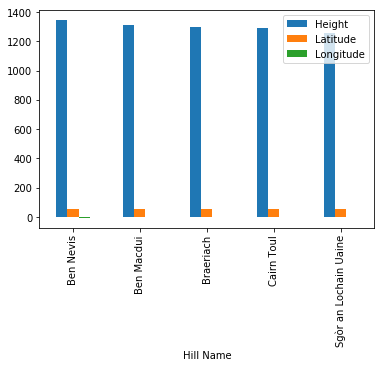

In [21]:
%matplotlib inline
data.set_index("Hill Name",inplace=True)
data.plot.bar()

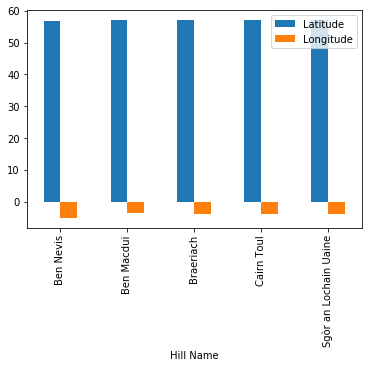

In [22]:
data[["Latitude", "Longitude"]].plot.bar()

## Operations

### Unique Values

In [23]:
data['Region'].unique()

array(['Grampian', 'Cairngorm'], dtype=object)

In [24]:
data['Region'].nunique()

2

In [25]:
data['Region'].value_counts()

Cairngorm    4
Grampian     1
Name: Region, dtype: int64

### Filtering

In [28]:
newdf = data[(data['Region']=="Cairngorm") & (data['Height']<1300)]
newdf

,Height,Latitude,Longitude,Region
Hill Name,,,,
Braeriach,1296,57.078628,-3.728024,Cairngorm
Cairn Toul,1291,57.054611,-3.710420,Cairngorm
Sgòr an Lochain Uaine,1258,57.057999,-3.725416,Cairngorm


### Applying Functions

In [37]:
# lambda, map, and filter recap
def even(num):
    if num%2==0:
        return True
    
a = [5, 7, 34, 56, 79, 86]
even_check = list(filter(lambda num: num%2==0 , a))
even_check


# list comprehension recap
even_list = []
for num in a:
    if num%2 ==0:
        even_list.append(num)

even_list = [num for num in a if num%2==0]
even_list

[34, 56, 86]

In [32]:
def meterToFeet(meter):
    return meter*3.281

In [33]:
data['Height'].apply(meterToFeet)

Hill Name
Ben Nevis                4412.945
Ben Macdui               4294.829
Braeriach                4252.176
Cairn Toul               4235.771
Sgòr an Lochain Uaine    4127.498
Name: Height, dtype: float64

In [36]:
data['Region'].apply(len)

Hill Name
Ben Nevis                8
Ben Macdui               9
Braeriach                9
Cairn Toul               9
Sgòr an Lochain Uaine    9
Name: Region, dtype: int64

In [38]:
data['Height'].sum()

6499

In [38]:
data.columns

Index(['Height', 'Latitude', 'Longitude', 'Region'], dtype='object')

In [40]:
data.index

Index(['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul',
       'Sgòr an Lochain Uaine'],
      dtype='object', name='Hill Name')

In [59]:
# understanding default values
def summ(a=5, b=10):
    return a+b

print(summ())
print(summ(50))
print(summ(50,50))

def summ(a, b=10):
    return a+b

print(summ(50))
print(summ(50,50))

def summ(a, b=10, c=15, d=20):
    return a+c

print(summ(50,c=50))

100


In [40]:
data.sort_values(by='Height')

,Height,Latitude,Longitude,Region
Hill Name,,,,
Sgòr an Lochain Uaine,1258,57.057999,-3.725416,Cairngorm
Cairn Toul,1291,57.054611,-3.710420,Cairngorm
Braeriach,1296,57.078628,-3.728024,Cairngorm
Ben Macdui,1309,57.070453,-3.668262,Cairngorm
Ben Nevis,1345,56.796850,-5.003508,Grampian


In [39]:
data.sort_values(by='Height', ascending=False)

,Height,Latitude,Longitude,Region
Hill Name,,,,
Ben Nevis,1345,56.796850,-5.003508,Grampian
Ben Macdui,1309,57.070453,-3.668262,Cairngorm
Braeriach,1296,57.078628,-3.728024,Cairngorm
Cairn Toul,1291,57.054611,-3.710420,Cairngorm
Sgòr an Lochain Uaine,1258,57.057999,-3.725416,Cairngorm


In [46]:
data.isnull()

,Unnamed: 0,Height,Latitude,Longitude,Region
Hill Name,,,,,
Sgòr an Lochain Uaine,False,False,False,False,False
Cairn Toul,False,False,False,False,False
Braeriach,False,False,False,False,False
Ben Macdui,False,False,False,False,False
Ben Nevis,False,False,False,False,False


In [3]:
testdf = pd.read_html('https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyDataTable.aspx')
testdf

[                   0                                                  1  \
 0                NaN                                                NaN   
 1          Threshold                                               <150   
 2             County  Avg # tests per day (per 100,000 population) (...   
 3           Alameda*                                                ---   
 4             Alpine                                                ---   
 5             Amador                                                ---   
 6             Butte*                                                ---   
 7          Calaveras                                                ---   
 8            Colusa*                                                ---   
 9      Contra Costa*                                                ---   
 10         Del Norte                                                ---   
 11         El Dorado                                                ---   
 12         

In [70]:
# !pip install html5lib
# !pip install lxml
# !pip install BeautifulSoup4
import lxml
import html5lib
import bs4
# import beautifulsoup
dfabc = pd.read_html('https://datatables.net/examples/basic_init/multiple_tables.html', flavor='lxml')
dfabc[0]

HTTPError: HTTP Error 403: Forbidden

In [4]:
testdf[0]

,0,1,2,3,4,5,6
0,NaN,NaN,Elevated Disease Transmission,Elevated Disease Transmission,Increasing Hospitalization**,Limited HospitalCapacity**,Limited HospitalCapacity**
1,Threshold,<150,Case Rate >100ORCase Rate >25 AND Positivity >8%,Case Rate >100ORCase Rate >25 AND Positivity >8%,>10% Increase,<20% ICU Beds AvailableOR <25% Ventilators Ava...,<20% ICU Beds AvailableOR <25% Ventilators Ava...
2,County,"Avg # tests per day (per 100,000 population) (...","Case rate per 100,000 (14 days)",Testing positivity (%) (7 day average with a 7...,% Change in 3-day avg COVID+ hospitalized pati...,% ICU beds currently available,% Ventilators currently available
3,Alameda*,---,---,---,✔,✔,✔
4,Alpine,---,---,---,---,---,---
5,Amador,---,---,---,✔,✔,✔
6,Butte*,---,---,---,✔,✔,✔
7,Calaveras,---,---,---,---,✔,✔
8,Colusa*,---,---,---,✔,---,✔
9,Contra Costa*,---,---,---,✔,✔,✔


In [53]:
testdf[0].head()

,0,1,2,3,4,5,6
0,NaN,NaN,Elevated Disease Transmission,Elevated Disease Transmission,Increasing Hospitalization**,Limited HospitalCapacity**,Limited HospitalCapacity**
1,Threshold,<150,Case Rate >100ORCase Rate >25 AND Positivity >8%,Case Rate >100ORCase Rate >25 AND Positivity >8%,>10% Increase,<20% ICU Beds AvailableOR <25% Ventilators Ava...,<20% ICU Beds AvailableOR <25% Ventilators Ava...
2,County,"Avg # tests per day (per 100,000 population) (...","Case rate per 100,000 (14 days)",Testing positivity (%) (7 day average with a 7...,% Change in 3-day avg COVID+ hospitalized pati...,% ICU beds currently available,% Ventilators currently available
3,Alameda*,---,---,---,✔,✔,✔
4,Alpine,---,---,---,---,---,---


In [5]:
len(testdf)

1

In [6]:
testdf1 = pd.read_html('https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data')
testdf1[0].head()

Location[a]                     Cases[b] Deaths[c]  Recov.[d]  \
  Unnamed: 0_level_1          World[e] 20,292,486   741,380 12,588,119   
0                NaN  United States[f]    5227883    166536    2623907   
1                NaN         Brazil[g]    3112393    103099    2243124   
2                NaN             India    2329638     46091    1639599   
3                NaN         Russia[h]     902710     15260     710298   
4                NaN      South Africa     566109     10751     426125   

       Ref.  
        [2]  
0       [9]  
1  [13][14]  
2      [15]  
3      [16]  
4      [17]

## Dataframe Merging, Joining, Concatenating 

In [54]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [55]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Concatenation

In [56]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [57]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merging/Joining

In [56]:
df5 = pd.DataFrame({'index': ['W', 'X', 'Y', 'Z'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
df6 = pd.DataFrame({'index': ['W', 'X', 'Z', 'Z'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']}) 

In [57]:
pd.merge(df5,df6,how='inner',on='index')

,index,A,B,C,D
0,W,A0,B0,C0,D0
1,X,A1,B1,C1,D1
2,Z,A3,B3,C2,D2
3,Z,A3,B3,C3,D3


In [61]:
df5 = pd.DataFrame({'index1': ['K0', 'K0', 'K1', 'K2'],
                     'index2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
df6 = pd.DataFrame({'index1': ['K0', 'K1', 'K1', 'K2'],
                               'index2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [62]:
pd.merge(df5,df6,how='inner',on=['index1','index2'])

,index1,index2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [63]:
pd.merge(df5,df6,how='outer',on=['index1','index2'])

,index1,index2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [64]:
pd.merge(df5,df6,how='right',on=['index1','index2'])

,index1,index2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [65]:
pd.merge(df5,df6,how='left',on=['index1','index2'])

,index1,index2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [67]:
# other way around
df5.merge(df6, how='inner', on=['index1','index2'])

,index1,index2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [85]:
new1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

new2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [86]:
new1.join(new2)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [87]:
new1.join(new2, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3
